In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("PrePlacement.csv") 

In [3]:
dataset.isnull().sum()  


sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [4]:
import seaborn as sns

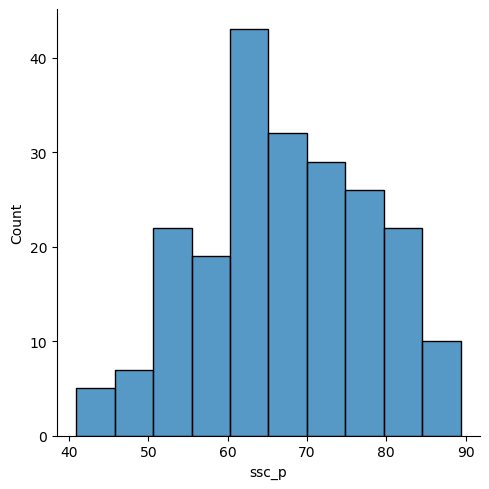

In [5]:
sns.displot(dataset["ssc_p"])

Mean=67.303, Standard Deviation=10.827
The area between range(60,70):0.3449514151280293


C:\Users\krsut\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


0.3449514151280293

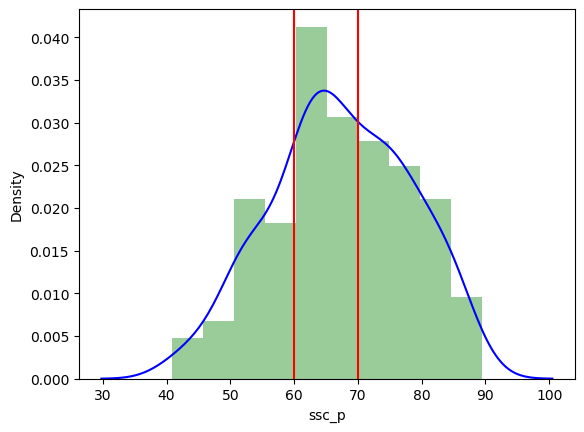

In [7]:
get_pdf_probability(dataset["ssc_p"],60,70)

In [6]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

In [8]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['ssc_p'])
ecdf(80)

ModuleNotFoundError: No module named 'statsmodels'

In [9]:
#!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 3.7 MB/s eta 0:00:00
     -------------------------------------- 232.9/232.9 kB 3.5 MB/s eta 0:00:00


In [19]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset['ssc_p'])
prob_80 = ecdf(80)  # What fraction of data points are ≤ 80
prob_60 = ecdf(60)  # What fraction of data points are ≤ 60
print("Cumulative probability at 80% (i.e., ecdf(80)):", prob_80)
print("Cumulative probability at 60% (i.e., ecdf(60)):", prob_60)


Cumulative probability at 80% (i.e., ecdf(80)): 0.8651162790697674
Cumulative probability at 60% (i.e., ecdf(60)): 0.24186046511627907


In [20]:
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)
    #z_score.std()

C:\Users\krsut\anaconda3\envs\aiml\lib\site-packages\ipykernel_launcher.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  # This is added back by InteractiveShellApp.init_path()


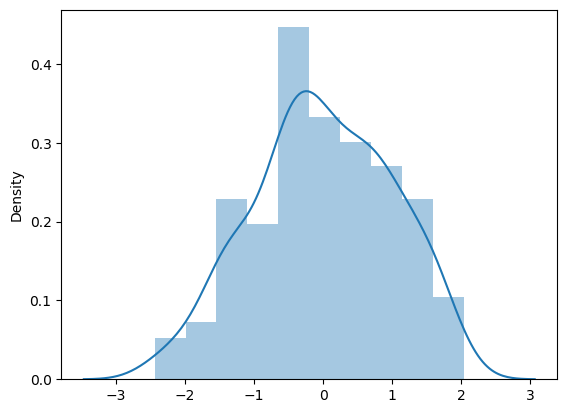

In [21]:
stdNBgraph(dataset["ssc_p"])